# Project 2

> Import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

> Read the dataset, both train and test

In [26]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Overlook the data

In [27]:
print(df.shape)
print(df_test.shape)

(2051, 81)
(879, 80)


In [28]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


> Inspect for outliers

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


> Seems like everything is good. Let's see how many **null** object of full amount has every column

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

> We definetely can drop following columns, because of number of null values:
- Alley
- Pool QC
- Fence
- Misc Feature


> Let's see on our data column by column, using **unique()** function.

In [31]:
for col in df.columns:
    print('======',col,'======')
    print(df[col].unique())
    print()

====== Id ======
[109 544 153 ... 916 639  10]

====== PID ======
[533352170 531379050 535304180 ... 909253010 535179160 527162130]

====== MS SubClass ======
[ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]

====== MS Zoning ======
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']

====== Lot Frontage ======
[ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]

====== Lot Area ======
[13517 11492  7922 ... 12444 11449  7558]

> We can see that it'is possible to create numeric data from categorical to following columns:
- Exter Qual
- Exter Cond
- Bsmt Qual
- Bsmt Cond
- Bsmt Exposure (scale a little difference, we need to use its own scale)
- Heating QC
- Central Air (yes or no, 1 or 0)
- Kitchen Qual
- Fireplace Qu
- Garage Qual
- Garage Cond
- Paved Drive (yes, partial, no - 1, 0.5, 0)
- Pool QC (but we are going to drop it)

## Clean up the data and creating new data

> Create functions that replace categorical data with numeric if possible.

In [32]:
# for Qual and Cond columns
def quality(str_qual):
    if isinstance(str_qual,str):
        qual={
            'Ex':5,
            'Gd':4,
            'TA':3,
            'Fa':2,
            'Po':1,
            'NA':0
        }
        return qual[str_qual]
    elif isinstance(str_qual,int):
        return str_qual
    else:
        return 0
    
# for Yes, Possible and No columns    
def yes_no(str_yn):
    if str_yn=='y' or str_yn=='Y':
        return 1
    elif str_yn=='p' or str_yn=='P':
        return 0.5
    elif str_yn=='n' or str_yn=='N':
        return 0
    else:
        return str_yn

# special for BsmtExposure    
def quality_exposure(str_qual):
    if isinstance(str_qual,str):
        qual={
            'Gd':4,
            'Av':3,
            'Mn':2,
            'No':1,
            'NA':0
        }
        return qual[str_qual]
    elif isinstance(str_qual,int):
        return str_qual
    else:
        return 0    

> Create function that clean the data and creating new columns if necessary

In [33]:
def clean_and_create_data(dataframe):
    # Drop columns that contains very few (less than 20%) non-null values
    dataframe.drop(axis=1,columns=['Alley','Pool QC','Fence','Misc Feature'],inplace=True)
    dataframe.dropna(axis=0)
    
    # For other columns do fillna, with 0 for numeric columns and NA for object
    for col,col_type in dataframe.dtypes.to_dict().items():
        if col_type==object:
            dataframe[col].fillna(value='NA',inplace=True)
        else: # we have only objects, ints and floats, no datetime
            dataframe[col].fillna(value=0,inplace=True)
   
    # Create new columns with age
    dataframe['Age']=2018 - dataframe['Year Built']
    dataframe['Remod Age']=2018 - dataframe['Year Remod/Add']
    dataframe['Garage Age']=2018 - dataframe['Garage Yr Blt']
    dataframe['Full Flr SF'] = dataframe['1st Flr SF'] + dataframe['2nd Flr SF']
    
    # Apply our functions for possible columns and create new columns with numeric type
    dataframe['Garage Qual'+' Num']=dataframe['Garage Qual'].map(quality)
    dataframe['Garage Cond'+' Num']=dataframe['Garage Cond'].map(quality)
    dataframe['Exter Qual'+' Num']=dataframe['Exter Qual'].map(quality)
    dataframe['Exter Cond'+' Num']=dataframe['Exter Cond'].map(quality)
    dataframe['Bsmt Qual'+' Num']=dataframe['Bsmt Qual'].map(quality)
    dataframe['Bsmt Cond'+' Num']=dataframe['Bsmt Cond'].map(quality)
    dataframe['Kitchen Qual'+' Num']=dataframe['Kitchen Qual'].map(quality)
    dataframe['Heating QC'+' Num']=dataframe['Heating QC'].map(quality) 
    dataframe['Central Air'+' Num']=dataframe['Central Air'].map(yes_no)
    dataframe['Paved Drive'+' Num']=dataframe['Paved Drive'].map(yes_no)
    dataframe['Bsmt Exposure'+' Num']=dataframe['Bsmt Exposure'].map(quality_exposure)
    dataframe['Fireplace Qu'+' Num']=dataframe['Fireplace Qu'].map(quality) 
    


> Apply our function to both train and test datasets

In [34]:
clean_and_create_data(df)
clean_and_create_data(df_test)

> For all the columns that have type 'object' we will sort values by mean SalePrice and enumerate them, creating new columns with the same name and suffix ' Rate

In [35]:
# collect the object columns to create dummies after this loop
dummies_col = []

for col,col_type in df.dtypes.to_dict().items():
    # check if type is object
    if col_type==object:
        # group by values, calculate the mean of SalePrice by each value, 
        # and collect values and mean price in a dict, then sort it by increasing of mean price
        my_dict = df[[col,'SalePrice']].groupby([col]).mean().sort_values(['SalePrice']).to_dict()['SalePrice']
        i = 0
        new_dict = {}
        # create new dict, assign every value it's rate (the same as serial number)
        for key in my_dict.keys():
            i+=1
            new_dict[key]=i

        # create new columns with suffix Rate for every object column    
        df[col+' Rate']=df[col].map(lambda x: new_dict[x]) 
        # may be that there is no such value in new_dict - assign it a zero
        df_test[col+' Rate']=df_test[col].map(lambda x: new_dict[x] if x in new_dict.keys() else 0)

        # we need to remember, that we can create dummies only for that columns, that have the same list of unique
        # values in both train and test datasets
        if sorted(df[col].unique())==sorted(df_test[col].unique()):
            dummies_col.append(col)

# create dummies, don't forget to drop first            
df = pd.get_dummies(columns=dummies_col,data=df,drop_first=True) 
df_test = pd.get_dummies(columns=dummies_col,data=df_test,drop_first=True)

## Select features for our model and create polynomial features

> Let's iterate throw correlation coefficients with SalePrice and select only columns that have coef upper some threshold

In [36]:
# by selecting different values, we found out that the best threshold is 0.03
threshold = 0.03
columns = []
exclude_columns = ['SalePrice']
for col,coef in df.corrwith(df['SalePrice']).to_dict().items():
    if np.abs(coef)>=threshold and col not in exclude_columns:
        columns.append(col)

print(len(columns))

163


 > Based on chosen columns (features) create X and y for further linear regression

In [37]:
# create X and X_test
X1 = df.loc[:,columns]
X1_test = df_test.loc[:,columns]

# create y
y = df.loc[:,['SalePrice']]

# apply polynomial features for both X and X_test
poly = PolynomialFeatures(include_bias=False,degree=2)
X2 = poly.fit_transform(X1)
X2_test = poly.fit_transform(X1_test)

# because X2 and X2_test are arrays, create dataframes again
X3 = pd.DataFrame(X2,columns=poly.get_feature_names(columns))
X3_test = pd.DataFrame(X2_test,columns=poly.get_feature_names(columns))

# select values by its correlation with SalePrice, one more time - after creating polynomial features
# by selecting different values, we found out that the best threshold is 0.59
threshold = 0.59
columns_poly = []
exclude_columns = ['SalePrice']
corr_dict = X3.corrwith(df['SalePrice']).to_dict()
for col,coef in corr_dict.items():
    if np.abs(coef)>=threshold and col not in exclude_columns:
        columns_poly.append(col)

# apply columns_poly filter to our X3 and X3_test        
X4 = X3[columns_poly]
X4_test = X3_test[columns_poly]

# and scale our datasets for ridge and lasso regression
ss = StandardScaler()
ss.fit(X4)
X_poly = ss.transform(X4)
X_test_poly = ss.transform(X4_test)
print(len(columns_poly))

877


> Just in case I'm going to show what gave us polynomial transform. Let's see at the interaction of two features: one was originally in our dataset (Gr Liv Area) and one we created (Neighborhood Rate), both of them have high correlation with SalePrice

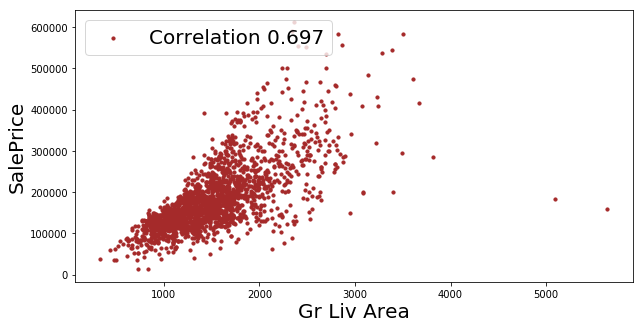

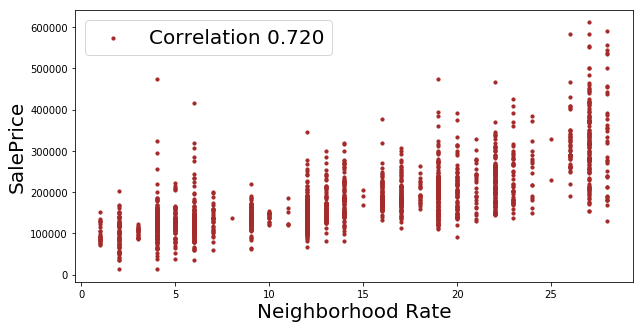

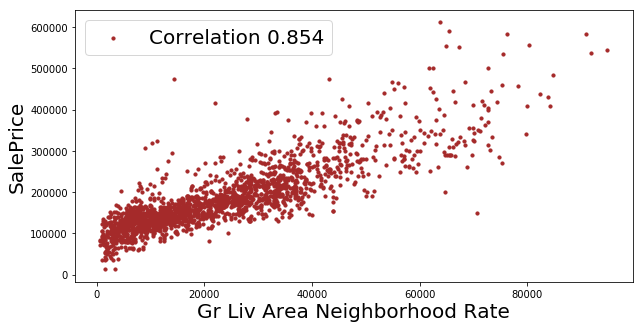

In [38]:

for i in ['Gr Liv Area','Neighborhood Rate','Gr Liv Area Neighborhood Rate']:
    plt.figure(figsize=[10,5])
    plt.scatter(X3[i],y,c='brown',s=10,label='Correlation %.3f' % corr_dict[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('SalePrice',fontsize=20)
    plt.legend(loc='upper left',fontsize=20)
    plt.show()

## Fit several models

> ### Linear regression

In [39]:
lm_poly = LinearRegression()
model_poly = lm_poly.fit(X_poly,y)
kf = KFold(n_splits=5, shuffle=True,random_state=111)
print('Linear regression score: ',cross_val_score(lm_poly,X_poly,y,cv=kf).mean())

Linear regression score:  -4.1413953544430886e+17


Seems like it doesn't work properly, huh... I believe it's because of huge number of predictors

> ### Ridge regression 

In [40]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0,7,200)

# Fit ridge regression with cross-validation to select best alpha
ridge_reg_CV = RidgeCV()
ridge_reg_CV.set_params(alphas=r_alphas)
ridge_reg_CV.fit(X_poly,y)

best_r_alpha = ridge_reg_CV.alpha_
print('Best alpha: ',best_r_alpha)

ridge_reg = Ridge()
ridge_reg.set_params(alpha=best_r_alpha)
ridge_reg.fit(X_poly,y)
kf = KFold(n_splits=5, shuffle=True,random_state=111)
print('Ridge regression score: ',cross_val_score(ridge_reg,X_poly,y,cv=kf).mean())

Best alpha:  35.2970730273065
Ridge regression score:  0.9156700958697266


It looks much better but we need to try other models

> ### Random forest regression

In [41]:
rf = RandomForestRegressor()
rf.fit(X_poly,y)
kf = KFold(n_splits=5, shuffle=True,random_state=111)
print('Random forest score: ',cross_val_score(rf,X_poly,y,cv=kf).mean())

Random forest score:  0.8928802403438922


It is not as good as we expected

> ### Lasso regression

In [42]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
l_alphas = np.logspace(0,6,20)

# Set up a lasso regression object
lasso_reg_CV = LassoCV()
lasso_reg_CV.set_params(alphas=l_alphas)
lasso_reg_CV.fit(X_poly,y)

best_l_alpha = lasso_reg_CV.alpha_
print('Best alpha: ',best_l_alpha)

lasso_reg = Lasso()
lasso_reg.set_params(alpha=best_l_alpha)
lasso_reg.fit(X_poly,y)
print('Lasso regression score:', cross_val_score(lasso_reg,X_poly,y,cv=kf).mean())

Best alpha:  78.47599703514611
Lasso regression score: 0.9183306452961275


Not bad, for now it's the best result. Let's see how many features with coefficiens that don't equal to zero are there.

In [43]:
count = 0
for i in range(len(columns_poly)):
    if lasso_reg.coef_[i]!=0:
        count +=1
        #print(columns_poly[i])#,lasso_reg.coef_[i])
print('Number of features that were selected by lasso: {}'.format(count))        

Number of features that were selected by lasso: 177


> We see, that lasso selected many interaction features, not only simple.

> ### K nearest neighbours

In [20]:
kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(X_poly,y)
print('K nearest neighbors regression score: ',cross_val_score(kn,X_poly,y,cv=kf).mean())

K nearest neighbors regression score:  0.8738298662757467


Not as good as we expected

> ### Try boosting regression

In [21]:
br = GradientBoostingRegressor()
br.fit(X_poly,y)
print("Gradient boosting regression score: ",cross_val_score(br,X_poly,y,cv=kf).mean())

Gradient boosting regression score:  0.9065140899589146


Not as good as we expected

> ### XGB regression

In [22]:
xgb = xgb.XGBRegressor()
xgb.fit(X_poly,y)
print("XGB regression score: ",cross_val_score(xgb,X_poly,y,cv=kf).mean())

XGB regression score:  0.9024584895299229


Not as good as we expected

> ### Create prediction based on lasso model - it has the best score

In [23]:
y_test = lasso_reg.predict(X_test_poly) 

> ### Write result to csv and submit it to Kaggle

In [24]:
df_y_test = df_test.loc[:,['Id']]
df_y_test.index = df_y_test['Id']
df_y_test['SalePrice']=y_test
df_y_test.sort_values(['Id'],inplace=True)

df_y_test[['SalePrice']].to_csv('result.csv',index='Id')